In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline

In [6]:
data = pd.read_csv('Spectrum_ground_truth_v1.csv')

In [12]:
#extracting agronomic gt to merge with biochemical traits
merge_to_bio = data.loc[:, ['PLOT ID', 'SLA', 'LWC', 'CHL']]

In [13]:
merge_to_bio.to_csv("agronomic_gt_only.csv", index=False)

In [4]:
data.columns[0:30]

Index(['PLOT ID', 'Fresh_weight', 'Leaf_area', 'LWC', 'SLA', 'CHL', 'CHL1',
       'CHL2', 'CHL3', 'Dry_weight', 'rows', 'ranges', 'Block', 'Rep', 'Group',
       'Trt', 'year', 'genotype', 'note', 'Calibration', 'ASD', '350', '351',
       '352', '353', '354', '355', '356', '357', '358'],
      dtype='object')

In [5]:
##For Michael
"""
data_first = data.loc[:, ['PLOT ID', 'year',  'genotype', 'Rep', 'Trt', 'Group', 'Fresh_weight', 'Leaf_area', 'LWC', 'SLA', 'CHL', 'Dry_weight']]
data_last = data.iloc[:, 21:2173]
conc = pd.concat([data_first, data_last], axis=1)
conc.to_csv('BGEM_with_ground_truth_for_michael.csv' , index=False)
"""

"\ndata_first = data.loc[:, ['PLOT ID', 'year',  'genotype', 'Rep', 'Trt', 'Group', 'Fresh_weight', 'Leaf_area', 'LWC', 'SLA', 'CHL', 'Dry_weight']]\ndata_last = data.iloc[:, 21:2173]\nconc = pd.concat([data_first, data_last], axis=1)\nconc.to_csv('BGEM_with_ground_truth_for_michael.csv' , index=False)\n"

In [451]:
data = data.loc[data['350'].notnull(), :]

In [452]:
trait = 'SLA'

In [453]:
df = data.loc[data[trait].notnull(), :]

In [454]:
df.columns[0:20]

Index(['PLOT ID', 'Fresh_weight', 'Leaf_area', 'LWC', 'SLA', 'CHL', 'CHL1',
       'CHL2', 'CHL3', 'Dry_weight', 'rows', 'ranges', 'Block', 'Rep', 'Group',
       'Trt', 'year', 'genotype', 'note', 'Calibration'],
      dtype='object')

In [455]:
df

,PLOT ID,Fresh_weight,Leaf_area,LWC,SLA,CHL,CHL1,CHL2,CHL3,Dry_weight,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
4,1005,7.73,366.00,77.490298,210.344828,NaN,NaN,NaN,NaN,1.74,...,0.035746,0.035719,0.035662,0.035373,0.035116,0.034928,0.034894,0.035089,0.035207,0.035318
6,1007,12.37,598.00,74.211803,187.460815,NaN,NaN,NaN,NaN,3.19,...,0.063127,0.062848,0.062419,0.061859,0.061757,0.061780,0.061694,0.061778,0.061602,0.061258
18,1019,15.13,535.00,80.304032,179.530201,NaN,NaN,NaN,NaN,2.98,...,0.047240,0.047197,0.047097,0.047076,0.047109,0.047000,0.046865,0.046916,0.046800,0.046609
153,1154,12.38,451.00,75.201939,146.905537,NaN,NaN,NaN,NaN,3.07,...,0.051336,0.051330,0.050878,0.050832,0.050811,0.050747,0.050927,0.050916,0.050690,0.050420
155,1156,15.98,621.00,77.346683,171.546961,NaN,NaN,NaN,NaN,3.62,...,0.037923,0.038071,0.038045,0.038280,0.038452,0.038060,0.037492,0.037041,0.036808,0.036783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2386,4587,14.96,628.00,72.526738,152.798054,552.066667,493.6,585.4,577.2,4.11,...,0.047897,0.047782,0.047766,0.047935,0.047922,0.047873,0.047877,0.047550,0.047167,0.046907
2388,4589,11.62,525.80,74.268503,175.852843,457.700000,377.0,478.6,517.5,2.99,...,0.044129,0.043988,0.043800,0.043439,0.043239,0.043229,0.043340,0.043594,0.043514,0.043296
2389,4590,12.32,503.80,72.077922,146.453488,483.700000,382.4,508.5,560.2,3.44,...,0.053184,0.053091,0.052986,0.052769,0.052454,0.052359,0.052218,0.052067,0.051874,0.051651
2390,4591,11.17,505.87,72.873769,166.953795,521.533333,465.5,541.6,557.5,3.03,...,0.054906,0.054912,0.054887,0.054571,0.054200,0.053860,0.053767,0.053851,0.053684,0.053643


In [456]:
data

,PLOT ID,Fresh_weight,Leaf_area,LWC,SLA,CHL,CHL1,CHL2,CHL3,Dry_weight,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.035234,0.035088,0.034933,0.034826,0.034614,0.034352,0.034138,0.033865,0.033638,0.033476
1,1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.037554,0.037249,0.037154,0.037163,0.037074,0.037141,0.037005,0.036618,0.036303,0.035844
2,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.042723,0.042242,0.042083,0.041943,0.041776,0.041955,0.041835,0.041389,0.041090,0.040662
3,1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.041980,0.041998,0.041733,0.041467,0.041499,0.041415,0.041049,0.041078,0.041080,0.040855
4,1005,7.73,366.0,77.490298,210.344828,NaN,NaN,NaN,NaN,1.74,...,0.035746,0.035719,0.035662,0.035373,0.035116,0.034928,0.034894,0.035089,0.035207,0.035318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,4596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.059570,0.059487,0.059379,0.059312,0.059066,0.058804,0.058750,0.058499,0.058298,0.058202
2396,4597,16.62,660.4,73.285199,148.738739,536.6,458.9,552.0,598.9,4.44,...,0.045764,0.045825,0.045893,0.045686,0.045541,0.045311,0.045272,0.045472,0.045199,0.045085
2397,4598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.056652,0.056354,0.056035,0.055800,0.055557,0.055148,0.054880,0.054803,0.054617,0.054308
2398,4599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.050402,0.050328,0.050200,0.049665,0.049339,0.049328,0.049174,0.048901,0.048625,0.048320


In [457]:
#Identify x 
position_350 = df.columns.get_loc('350')
position_2500 = df.columns.get_loc('2500') + 1 
X = df.iloc[:, position_350 : position_2500]

In [458]:
#Extracting the column names
col_names=X.columns

In [459]:
#applying savitzky golay
X = savgol_filter(X, window_length=5 , polyorder = 2)
X = pd.DataFrame(X, columns=col_names)

In [460]:
#drop first 100 column
X = X.drop(X.columns[0:100], axis=1)

In [461]:
#Create a np array for downsampling for every 5 nm
column_filter = np.arange(0, 2055, 5)

In [462]:
# Choose from the X based on filtering array
X = X.iloc[: , column_filter]

In [463]:
# PLOT ID column was added again for merging 
X.insert(0, 'PLOT ID', np.array(df['PLOT ID']))

In [464]:
first_columns = df[['PLOT ID', 'Fresh_weight', 'Leaf_area', 'LWC', 'SLA', 'CHL', 'CHL1',
       'CHL2', 'CHL3', 'Dry_weight', 'rows', 'ranges', 'Block', 'Rep', 'Trt',
       'year', 'genotype', 'note', 'Calibration', 'ASD']]



In [465]:
#merging GEM gt
df=pd.merge(first_columns, X, how='outer')

In [466]:
df

,PLOT ID,Fresh_weight,Leaf_area,LWC,SLA,CHL,CHL1,CHL2,CHL3,Dry_weight,...,2455,2460,2465,2470,2475,2480,2485,2490,2495,2500
0,1005,7.73,366.00,77.490298,210.344828,NaN,NaN,NaN,NaN,1.74,...,0.044459,0.042922,0.041521,0.040042,0.038764,0.037882,0.036749,0.035767,0.035112,0.035336
1,1007,12.37,598.00,74.211803,187.460815,NaN,NaN,NaN,NaN,3.19,...,0.076053,0.073855,0.071431,0.069493,0.067616,0.066283,0.065054,0.063237,0.061748,0.061285
2,1019,15.13,535.00,80.304032,179.530201,NaN,NaN,NaN,NaN,2.98,...,0.054565,0.053394,0.051987,0.050874,0.049819,0.049170,0.048072,0.047340,0.047082,0.046629
3,1154,12.38,451.00,75.201939,146.905537,NaN,NaN,NaN,NaN,3.07,...,0.057561,0.056364,0.055173,0.053919,0.052950,0.052544,0.052102,0.051315,0.050781,0.050402
4,1156,15.98,621.00,77.346683,171.546961,NaN,NaN,NaN,NaN,3.62,...,0.045437,0.044465,0.042950,0.041319,0.040629,0.039683,0.038914,0.038143,0.038376,0.036775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,4587,14.96,628.00,72.526738,152.798054,552.066667,493.6,585.4,577.2,4.11,...,0.057304,0.055618,0.054255,0.052254,0.051160,0.050028,0.048961,0.048075,0.047927,0.046863
266,4589,11.62,525.80,74.268503,175.852843,457.700000,377.0,478.6,517.5,2.99,...,0.053143,0.051391,0.050009,0.048248,0.047225,0.045835,0.045225,0.044159,0.043247,0.043314
267,4590,12.32,503.80,72.077922,146.453488,483.700000,382.4,508.5,560.2,3.44,...,0.065332,0.063273,0.061116,0.059545,0.057473,0.055754,0.054691,0.053247,0.052504,0.051653
268,4591,11.17,505.87,72.873769,166.953795,521.533333,465.5,541.6,557.5,3.03,...,0.065816,0.063957,0.062021,0.060217,0.058768,0.057140,0.056466,0.055024,0.054189,0.053637


In [467]:
brooke = pd.read_csv('Brooke_gt_merged')

In [468]:
brooke.columns

Index(['Unnamed: 0', 'PLOT ID', 'Rep', 'Growth_Stage', 'Dry weight',
       'Genotype ', 'Location', 'CHL', 'LWC', 'SLA',
       ...
       '2455', '2460', '2465', '2470', '2475', '2480', '2485', '2490', '2495',
       '2500'],
      dtype='object', length=426)

In [469]:
216+68

284

In [470]:
brooke.loc[brooke['Location'] == 'SAM' , 'Rep'].value_counts()

2    34
1    34
Name: Rep, dtype: int64

In [471]:
brooke.rename(columns={'Dry weight': 'Dry_weight'},inplace=True)

In [472]:
data_all_v1 = pd.concat([df, brooke])

In [473]:
data_all_v1.reset_index(inplace=True, drop=True)

In [474]:
## Adding 18-20 data
M1820 = pd.read_csv('Maize18-20.csv' , dtype= {'Year' : 'category' , 'Genotpye' : 'object' , 'Conditions' : 'category' , 'crop' : 'category',
                                              'pheno' : 'category' , 'StalkLodgingPct' : 'object'})

/tmp/ipykernel_3487576/2395910572.py:2: DtypeWarning: Columns (1,2166,2182,2188,2189) have mixed types. Specify dtype option on import or set low_memory=False.
  M1820 = pd.read_csv('Maize18-20.csv' , dtype= {'Year' : 'category' , 'Genotpye' : 'object' , 'Conditions' : 'category' , 'crop' : 'category',


In [475]:
M1820.rename(columns = {'PlotID' : 'PLOT ID', 'Chlorophyll' : 'CHL', 'Leaf_Dry_Weight' : 'Dry_weight', 
                       'Leaf_Fresh_Weight': 'Fresh_weight', 'Leaf_Area' : 'Leaf_area', 'Specific_Leaf_Area': 'SLA'
                       },inplace=True)

In [476]:
LWC = M1820['Leaf_Water_Content'] *100

In [477]:
M1820.insert(3, 'LWC', LWC)

# DIGER TARAFTA CALISAN KOD#

In [478]:
M1820_trait = M1820.loc[M1820[trait].notnull(), :]

In [479]:
y= M1820_trait.loc[M1820_trait['Year'] != '2020', trait]

In [480]:
y

0       1420.57
1       1144.10
2        898.15
3       1387.85
4       2269.29
         ...   
1205     890.85
1206    1231.98
1207    1154.34
1208    1096.09
1209    1208.27
Name: Leaf_area, Length: 1210, dtype: float64

In [481]:
# selecting the hyperspectral Data
X_total = M1820_trait.loc[M1820_trait.Year != '2020']
X_total =  X_total.iloc[: ,11:2162]


In [482]:
#remove the first 100
X_total.drop(columns = X_total.columns[0:100], inplace = True) 

In [483]:
sav_X = savgol_filter(X_total, window_length=5 , polyorder = 2)
sav_X.shape
df = pd.DataFrame(sav_X)
df.shape

(1210, 2051)

In [484]:
#Identify x 
position_350 = M1820.columns.get_loc('350')
position_2500 = M1820.columns.get_loc('2500') + 1 
X = M1820.iloc[:, position_350 : position_2500]

In [485]:
## Downsampling every 5 nm
column_filter = np.arange(0,2050,5)  ## creating an index for column filtering
X= df.iloc[:, column_filter] # selecting the filtered columns 

In [486]:
X

,0,5,10,15,20,25,30,35,40,45,...,2000,2005,2010,2015,2020,2025,2030,2035,2040,2045
0,0.055697,0.056308,0.056915,0.056282,0.056266,0.056073,0.056486,0.056540,0.056949,0.057578,...,0.057044,0.055040,0.053502,0.051976,0.049967,0.048784,0.047596,0.046577,0.045197,0.044646
1,0.047062,0.047666,0.047747,0.047487,0.047766,0.046779,0.046745,0.046928,0.047551,0.047418,...,0.047882,0.046358,0.044865,0.043462,0.042257,0.041001,0.039954,0.038982,0.038187,0.037446
2,0.062530,0.063193,0.062680,0.062740,0.062249,0.062587,0.062033,0.062406,0.062671,0.062889,...,0.056217,0.054824,0.053451,0.051938,0.050669,0.049414,0.048448,0.047853,0.046589,0.046291
3,0.063028,0.063757,0.063248,0.063293,0.062883,0.062799,0.062553,0.062622,0.062960,0.063268,...,0.064278,0.062191,0.060239,0.058462,0.056742,0.055065,0.053999,0.052615,0.051718,0.051120
4,0.054530,0.054946,0.055045,0.055068,0.054493,0.054601,0.054903,0.054883,0.055037,0.056045,...,0.053655,0.051827,0.050021,0.048608,0.047107,0.045579,0.044420,0.043319,0.042522,0.041772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,0.057272,0.058190,0.057879,0.058228,0.057853,0.058498,0.058227,0.058802,0.059593,0.060809,...,0.064457,0.062125,0.060015,0.058034,0.056200,0.054787,0.053162,0.051628,0.050305,0.049649
1206,0.057040,0.057745,0.058330,0.058418,0.057895,0.058482,0.058230,0.058855,0.059583,0.061044,...,0.055797,0.053935,0.052303,0.050909,0.049426,0.048202,0.047013,0.045861,0.045102,0.044514
1207,0.053451,0.054180,0.054320,0.055093,0.054959,0.054680,0.054053,0.054917,0.055920,0.058343,...,0.054466,0.052688,0.050861,0.049238,0.047786,0.046560,0.045238,0.044029,0.043427,0.042548
1208,0.058446,0.060851,0.061359,0.060725,0.061255,0.060597,0.061148,0.061762,0.063008,0.065798,...,0.067403,0.065095,0.062842,0.060818,0.058809,0.057163,0.055674,0.054243,0.053074,0.052027


In [487]:
# split the dataset into training (60%) and testing (40%) sets
X_train,X_test,y_train,y_test = train_test_split(X, y ,test_size=0.4) 

In [488]:
### calculate RMSE
pls = PLSRegression(n_components=20)
pls.fit(X_train, y_train)

PLSRegression(n_components=20)

In [489]:
np.sqrt(mean_squared_error(y_test, pls.predict(X_test)))

319.2370957681474

In [490]:
y_pred = pls.predict(X_test)

<AxesSubplot: xlabel='Leaf_area', ylabel='Predicted LWC values'>

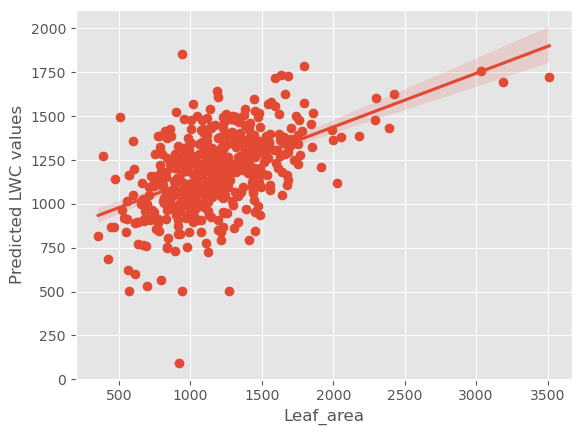

In [491]:
plt.scatter(y_test, y_pred)
plt.ylabel('Predicted LWC values')
plt.xlabel('Ground truth LWC measurements')
sns.regplot(x = y_test , y = y_pred)

In [492]:
from scipy.stats import pearsonr, spearmanr
y_pred2 = [x[0] for x in y_pred]

r, p = spearmanr(y_test, y_pred2)
r2 = r**2
print(r2, p)

0.23462055644778268 7.699028408871056e-30


# diger tarafta calisan kod #

In [493]:
M1820_trait = M1820.loc[M1820[trait].notnull(), :]
M1820_trait = M1820_trait.loc[M1820_trait['Year'] != '2020', :]

In [494]:
#Identify x 
position_350 = M1820_trait.columns.get_loc('350')
position_2500 = M1820_trait.columns.get_loc('2500') + 1 
X = M1820_trait.iloc[:, position_350 : position_2500]


In [495]:
M1820

,PLOT ID,Genotype,Year,LWC,Conditions,Nitrogen,Phosphorus,Potassium,CHL,Dry_weight,...,LeafWidthCM,PlantHeightCM,ExtantLeafNumber1,NodesWithBraceRoot,TillersPerPlant,ExtantLeafNumber2,BranchesPerTassel,TasselLengthCM,BranchZoneLengthCM,TasselSpikeLengthCM
0,1,MO45,2018,72.442997,Greenhouse,2.960,0.22,1.78,476.60,8.46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NC358,2018,75.716878,Greenhouse,3.110,0.48,2.74,492.17,6.69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,CI90C,2018,75.506958,Greenhouse,2.940,0.39,2.45,428.91,6.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,YU796-NS,2018,73.910035,Greenhouse,3.620,0.41,1.94,554.80,7.54,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,KI11,2018,76.611490,Greenhouse,2.480,0.27,1.41,425.94,12.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2863,2836,NaN,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.40,150.5,12.0,1.33,0.0,12.5,6.5,29.25,7.95,21.30
2864,2837,NaN,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.15,140.0,13.0,1.00,0.0,16.0,24.0,30.25,11.25,19.00
2865,2838,NaN,2020,81.549815,NaN,2.813,NaN,2.35,401.25,NaN,...,7.65,192.5,15.5,1.00,0.0,15.5,13.0,32.05,10.25,21.80
2866,2839,NaN,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.00,153.5,12.0,1.00,0.0,14.0,21.5,32.65,16.40,16.25


In [496]:
#drop first 100 column
X.drop(columns = X.columns[0:100], inplace=True)


In [497]:
#Extracting the column names
col_names=X.columns

In [498]:
#applying savitzky golay
X = savgol_filter(X, window_length=5 , polyorder = 2)
X = pd.DataFrame(X, columns=col_names)

In [499]:
#Create a np array for downsampling for every 5 nm
column_filter = np.arange(0, 2055, 5)

In [500]:
# Choose from the X based on filtering array
X = X.iloc[: , column_filter]

In [501]:
X

,450,455,460,465,470,475,480,485,490,495,...,2455,2460,2465,2470,2475,2480,2485,2490,2495,2500
0,0.055993,0.056322,0.056879,0.056425,0.056397,0.056072,0.056376,0.056658,0.056853,0.057798,...,0.054728,0.053201,0.051591,0.049702,0.048369,0.047261,0.046477,0.045248,0.044443,0.043548
1,0.047382,0.048127,0.047687,0.047716,0.047202,0.047071,0.046897,0.047100,0.046982,0.047486,...,0.045991,0.044575,0.043089,0.042055,0.040771,0.039858,0.038821,0.038129,0.037527,0.037481
2,0.062398,0.063536,0.062903,0.062879,0.062222,0.062713,0.061678,0.062325,0.062564,0.063002,...,0.054485,0.053088,0.051560,0.050420,0.049137,0.048187,0.047528,0.046476,0.046189,0.045660
3,0.063457,0.063583,0.063550,0.063454,0.063019,0.062917,0.062665,0.062473,0.062985,0.063494,...,0.061799,0.059871,0.058151,0.056560,0.054797,0.053684,0.052543,0.051463,0.050928,0.049942
4,0.054616,0.055025,0.055203,0.055006,0.054636,0.054771,0.054737,0.054916,0.055343,0.056322,...,0.051536,0.049742,0.048303,0.046935,0.045392,0.044128,0.043162,0.042092,0.041409,0.041218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,0.057219,0.058138,0.058779,0.057837,0.057801,0.058838,0.058261,0.058749,0.059975,0.061703,...,0.061812,0.059660,0.057641,0.055774,0.054333,0.052808,0.051459,0.050078,0.049260,0.048991
1206,0.057198,0.057884,0.058567,0.058332,0.058081,0.058744,0.058257,0.058976,0.060111,0.061822,...,0.053659,0.051965,0.050625,0.049163,0.047941,0.046869,0.045788,0.044659,0.044509,0.043547
1207,0.054172,0.054569,0.054368,0.055197,0.055280,0.055210,0.054157,0.055296,0.056307,0.058673,...,0.052351,0.050417,0.048966,0.047404,0.046277,0.045036,0.043880,0.042958,0.042473,0.041360
1208,0.058192,0.060730,0.061176,0.060620,0.060924,0.060902,0.061088,0.062168,0.063329,0.066407,...,0.064711,0.062493,0.060515,0.058571,0.056781,0.055330,0.053909,0.052883,0.051710,0.050706


In [502]:
# PLOT ID column was added again for merging 
X.insert(0, 'PLOT ID', np.array(M1820_trait['PLOT ID']))

In [503]:
X

,PLOT ID,450,455,460,465,470,475,480,485,490,...,2455,2460,2465,2470,2475,2480,2485,2490,2495,2500
0,1,0.055993,0.056322,0.056879,0.056425,0.056397,0.056072,0.056376,0.056658,0.056853,...,0.054728,0.053201,0.051591,0.049702,0.048369,0.047261,0.046477,0.045248,0.044443,0.043548
1,2,0.047382,0.048127,0.047687,0.047716,0.047202,0.047071,0.046897,0.047100,0.046982,...,0.045991,0.044575,0.043089,0.042055,0.040771,0.039858,0.038821,0.038129,0.037527,0.037481
2,3,0.062398,0.063536,0.062903,0.062879,0.062222,0.062713,0.061678,0.062325,0.062564,...,0.054485,0.053088,0.051560,0.050420,0.049137,0.048187,0.047528,0.046476,0.046189,0.045660
3,4,0.063457,0.063583,0.063550,0.063454,0.063019,0.062917,0.062665,0.062473,0.062985,...,0.061799,0.059871,0.058151,0.056560,0.054797,0.053684,0.052543,0.051463,0.050928,0.049942
4,5,0.054616,0.055025,0.055203,0.055006,0.054636,0.054771,0.054737,0.054916,0.055343,...,0.051536,0.049742,0.048303,0.046935,0.045392,0.044128,0.043162,0.042092,0.041409,0.041218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,1267,0.057219,0.058138,0.058779,0.057837,0.057801,0.058838,0.058261,0.058749,0.059975,...,0.061812,0.059660,0.057641,0.055774,0.054333,0.052808,0.051459,0.050078,0.049260,0.048991
1206,1268,0.057198,0.057884,0.058567,0.058332,0.058081,0.058744,0.058257,0.058976,0.060111,...,0.053659,0.051965,0.050625,0.049163,0.047941,0.046869,0.045788,0.044659,0.044509,0.043547
1207,1269,0.054172,0.054569,0.054368,0.055197,0.055280,0.055210,0.054157,0.055296,0.056307,...,0.052351,0.050417,0.048966,0.047404,0.046277,0.045036,0.043880,0.042958,0.042473,0.041360
1208,1270,0.058192,0.060730,0.061176,0.060620,0.060924,0.060902,0.061088,0.062168,0.063329,...,0.064711,0.062493,0.060515,0.058571,0.056781,0.055330,0.053909,0.052883,0.051710,0.050706


In [504]:
trait_column = M1820_trait[['PLOT ID', trait]]

In [505]:
#merging M1820 again
M1820=pd.merge(trait_column, X, how='outer')

In [506]:
M1820

,PLOT ID,Leaf_area,450,455,460,465,470,475,480,485,...,2455,2460,2465,2470,2475,2480,2485,2490,2495,2500
0,1,1420.57,0.055993,0.056322,0.056879,0.056425,0.056397,0.056072,0.056376,0.056658,...,0.054728,0.053201,0.051591,0.049702,0.048369,0.047261,0.046477,0.045248,0.044443,0.043548
1,2,1144.10,0.047382,0.048127,0.047687,0.047716,0.047202,0.047071,0.046897,0.047100,...,0.045991,0.044575,0.043089,0.042055,0.040771,0.039858,0.038821,0.038129,0.037527,0.037481
2,3,898.15,0.062398,0.063536,0.062903,0.062879,0.062222,0.062713,0.061678,0.062325,...,0.054485,0.053088,0.051560,0.050420,0.049137,0.048187,0.047528,0.046476,0.046189,0.045660
3,4,1387.85,0.063457,0.063583,0.063550,0.063454,0.063019,0.062917,0.062665,0.062473,...,0.061799,0.059871,0.058151,0.056560,0.054797,0.053684,0.052543,0.051463,0.050928,0.049942
4,5,2269.29,0.054616,0.055025,0.055203,0.055006,0.054636,0.054771,0.054737,0.054916,...,0.051536,0.049742,0.048303,0.046935,0.045392,0.044128,0.043162,0.042092,0.041409,0.041218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,1267,890.85,0.057219,0.058138,0.058779,0.057837,0.057801,0.058838,0.058261,0.058749,...,0.061812,0.059660,0.057641,0.055774,0.054333,0.052808,0.051459,0.050078,0.049260,0.048991
1206,1268,1231.98,0.057198,0.057884,0.058567,0.058332,0.058081,0.058744,0.058257,0.058976,...,0.053659,0.051965,0.050625,0.049163,0.047941,0.046869,0.045788,0.044659,0.044509,0.043547
1207,1269,1154.34,0.054172,0.054569,0.054368,0.055197,0.055280,0.055210,0.054157,0.055296,...,0.052351,0.050417,0.048966,0.047404,0.046277,0.045036,0.043880,0.042958,0.042473,0.041360
1208,1270,1096.09,0.058192,0.060730,0.061176,0.060620,0.060924,0.060902,0.061088,0.062168,...,0.064711,0.062493,0.060515,0.058571,0.056781,0.055330,0.053909,0.052883,0.051710,0.050706


In [507]:
data_all_v2 = pd.concat([data_all_v1, M1820])

In [508]:
data_all_v2

,PLOT ID,Fresh_weight,Leaf_area,LWC,SLA,CHL,CHL1,CHL2,CHL3,Dry_weight,...,2475,2480,2485,2490,2495,2500,Unnamed: 0,Growth_Stage,Genotype,Location
0,1005,7.73,366.00,77.490298,210.344828,NaN,NaN,NaN,NaN,1.74,...,0.038764,0.037882,0.036749,0.035767,0.035112,0.035336,NaN,NaN,NaN,NaN
1,1007,12.37,598.00,74.211803,187.460815,NaN,NaN,NaN,NaN,3.19,...,0.067616,0.066283,0.065054,0.063237,0.061748,0.061285,NaN,NaN,NaN,NaN
2,1019,15.13,535.00,80.304032,179.530201,NaN,NaN,NaN,NaN,2.98,...,0.049819,0.049170,0.048072,0.047340,0.047082,0.046629,NaN,NaN,NaN,NaN
3,1154,12.38,451.00,75.201939,146.905537,NaN,NaN,NaN,NaN,3.07,...,0.052950,0.052544,0.052102,0.051315,0.050781,0.050402,NaN,NaN,NaN,NaN
4,1156,15.98,621.00,77.346683,171.546961,NaN,NaN,NaN,NaN,3.62,...,0.040629,0.039683,0.038914,0.038143,0.038376,0.036775,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,1267,NaN,890.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.054333,0.052808,0.051459,0.050078,0.049260,0.048991,NaN,NaN,NaN,NaN
1206,1268,NaN,1231.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.047941,0.046869,0.045788,0.044659,0.044509,0.043547,NaN,NaN,NaN,NaN
1207,1269,NaN,1154.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.046277,0.045036,0.043880,0.042958,0.042473,0.041360,NaN,NaN,NaN,NaN
1208,1270,NaN,1096.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.056781,0.055330,0.053909,0.052883,0.051710,0.050706,NaN,NaN,NaN,NaN


In [557]:
#chhosing the data (SAM, HIPS, 1820 and BGEM combination or only BGEM)
data_all = data_all_v1

In [558]:
data_all = data_all.loc[data_all[trait].notnull(), :]

In [559]:
data_all = data_all.loc[data_all['450'].notnull(), :]

In [560]:
#defining a function to remove the outliers
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1=datacolumn.quantile(0.25)
 Q3=datacolumn.quantile(0.75)
 #Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.50 * IQR)
 upper_range = Q3 + (1.50 * IQR)
 return lower_range,upper_range

In [561]:
outlier_treatment(data_all[trait])

(168.07500000000002, 643.875)

In [562]:
lowerbound,upperbound = outlier_treatment(data_all[trait])

In [563]:
rm_index =data_all[(data_all[trait] < lowerbound) | (data_all[trait] > upperbound)].index
rm_index.size

7

In [564]:
data_all.drop(rm_index, axis=0 ,inplace=True)

In [565]:
#df= data_all.loc[data_all[trait].notnull(),:]
y = data_all.loc[:, trait]

In [566]:
y

0      366.0
1      598.0
2      535.0
3      451.0
4      621.0
       ...  
541    544.5
542    365.7
551    248.8
552    325.6
553    433.8
Name: Leaf_area, Length: 536, dtype: float64

In [567]:
#Scale the y
#y= scale(y)

In [568]:
position_450 = data_all.columns.get_loc('450')
position_2500 = data_all.columns.get_loc('2500') + 1 
X = data_all.iloc[:, position_450 : position_2500]

In [569]:
X

,450,455,460,465,470,475,480,485,490,495,...,2455,2460,2465,2470,2475,2480,2485,2490,2495,2500
0,0.035496,0.036285,0.036419,0.036677,0.036848,0.036885,0.036963,0.037299,0.038144,0.039155,...,0.044459,0.042922,0.041521,0.040042,0.038764,0.037882,0.036749,0.035767,0.035112,0.035336
1,0.051669,0.053216,0.053859,0.053814,0.054149,0.054459,0.054598,0.055209,0.056733,0.058923,...,0.076053,0.073855,0.071431,0.069493,0.067616,0.066283,0.065054,0.063237,0.061748,0.061285
2,0.049999,0.050574,0.050352,0.050312,0.050332,0.050178,0.050253,0.050561,0.050808,0.051360,...,0.054565,0.053394,0.051987,0.050874,0.049819,0.049170,0.048072,0.047340,0.047082,0.046629
3,0.053957,0.055385,0.055300,0.055314,0.055493,0.055750,0.055841,0.056223,0.057060,0.058567,...,0.057561,0.056364,0.055173,0.053919,0.052950,0.052544,0.052102,0.051315,0.050781,0.050402
4,0.039537,0.040387,0.040368,0.040519,0.041065,0.040819,0.040880,0.041399,0.042105,0.043318,...,0.045437,0.044465,0.042950,0.041319,0.040629,0.039683,0.038914,0.038143,0.038376,0.036775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,0.066723,0.067958,0.068309,0.068463,0.068465,0.068502,0.068561,0.068863,0.070051,0.072182,...,0.092813,0.090633,0.088661,0.086268,0.084279,0.082632,0.081726,0.080514,0.078979,0.078064
542,0.058527,0.059466,0.059698,0.059657,0.059730,0.059685,0.059820,0.060115,0.061046,0.062593,...,0.073851,0.072033,0.069996,0.068009,0.066089,0.065366,0.063772,0.063121,0.062455,0.061334
551,0.098444,0.100965,0.102857,0.104432,0.105387,0.105558,0.105939,0.107474,0.110890,0.116858,...,0.145673,0.143063,0.140345,0.137016,0.134043,0.131491,0.129041,0.126676,0.124981,0.123236
552,0.060475,0.061436,0.061868,0.062107,0.062182,0.062253,0.062386,0.062692,0.063855,0.065556,...,0.110756,0.109139,0.106557,0.103934,0.101411,0.099513,0.097904,0.095859,0.094690,0.093403


In [582]:
# split the dataset into training (60%) and testing (40%) sets
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.4)

In [571]:
#define the cv
cv = RepeatedKFold(n_splits=10, n_repeats=5)
mse = []

In [572]:
#Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 60):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, X, y, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(np.sqrt(score))
    n_comb = mse.index(min(mse)) +1

Text(0.5, 1.0, 'Leaf_area')

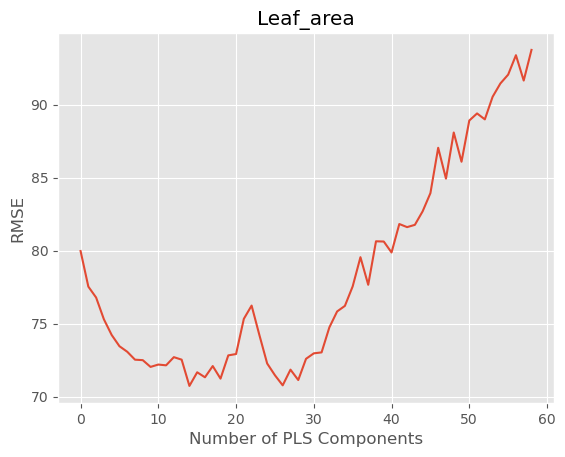

In [573]:
#plot test RMSE vs. number of components
plt.style.use('ggplot')
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('RMSE')
plt.title(trait)

In [574]:
### calculate RMSE
pls = PLSRegression(n_components=n_comb)
pls.fit(X_train, y_train)

PLSRegression(n_components=15)

In [575]:
np.sqrt(mean_squared_error(y_test, pls.predict(X_test)))

68.82784999062093

In [576]:
y_pred = pls.predict(X_test)

Text(250, 550, 'r$^2$ = 0.34')

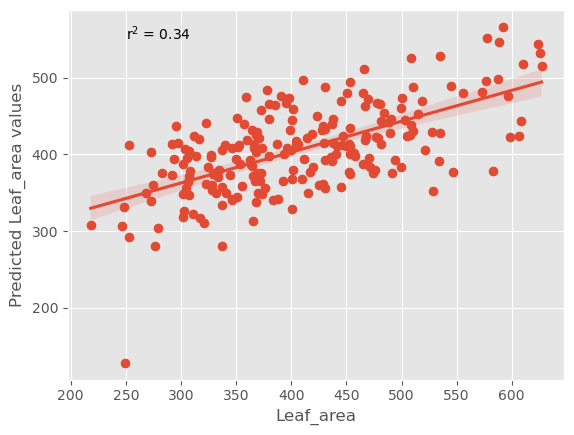

In [581]:
plt.scatter(y_test, y_pred)
plt.ylabel('Predicted' + ' ' + trait + ' ' + 'values')
plt.xlabel('Ground truth LWC measurements')
sns.regplot(x = y_test , y = y_pred)
plt.text(x=250 , y=550 , s='r$^2$ = 0.34'  )

In [578]:
from scipy.stats import pearsonr, spearmanr
y_pred2 = [x[0] for x in y_pred]

r, p = spearmanr(y_test, y_pred2)
r2 = r**2
print(r2, p)

0.34541290594143287 2.316623640017253e-21


# Predicting of whole dataset

In [579]:
X_test = saddata.loc[(data['CHL'].isnull()) & (data['450'].notnull()) , ]

NameError: name 'saddata' is not defined

In [ ]:
X_test

In [ ]:
#Identify x 
position_350 = X_test.columns.get_loc('350')
position_2500 = X_test.columns.get_loc('2500') + 1 
X_test = X_test.iloc[:, position_350 : position_2500]

In [ ]:
#Extracting the column names
col_names=X_test.columns

In [ ]:
#applying savitzky golay
X_test = savgol_filter(X_test, window_length=5 , polyorder = 2)
X_test = pd.DataFrame(X_test, columns=col_names)

In [ ]:
#drop first 100 column
X_test = X_test.drop(X_test.columns[0:100], axis=1)

In [ ]:
#Create a np array for downsampling for every 5 nm
column_filter = np.arange(0, 2055, 5)

In [ ]:
# Choose from the X based on filtering array
X_test = X_test.iloc[: , column_filter]

In [ ]:
X_test.loc[X_test['450'].isnull(), :]

In [ ]:
X_train = X

In [ ]:
X_train

In [ ]:
y_train = y

In [ ]:
y

In [ ]:
### calculate RMSE
pls = PLSRegression(n_components=n_comb)
pls.fit(X_train, y_train)

In [ ]:
y_pred = pls.predict(X_test)

In [ ]:
y_pred

In [ ]:
y_df = pd.DataFrame(y_pred)

In [ ]:
y_df = y_df.rename(columns= {0 : 'CHL'})

In [ ]:
X_test['CHL'] = y_pred

In [ ]:
X_test

In [ ]:
data.loc[(data['CHL'].isnull()) & (data['450'].notnull()), 'CHL' ] = y_pred

In [ ]:
data.to_csv('spectrum_ground_truth_v2_chlpredicted.csv', index=False)

In [ ]:
data.loc[(data['Group'] == 'Inbred') & (data['Trt'] == 'LN'),:].boxplot('CHL')

In [ ]:
data

In [ ]:
raw = pd.read_csv('Raw_spectrum_merged.csv')

In [ ]:
raw.drop(raw.filter(regex="Unname"),axis=1, inplace=True)

In [ ]:
data

In [ ]:
data_CHL = data.loc[ : ,  ['PLOT ID', 'CHL']]

In [ ]:
data_CHL

In [ ]:
last_merged = pd.merge(data_CHL, raw, how='outer')

In [ ]:
last_merged.sort_values('PLOT ID', ascending=True, ignore_index=True, inplace=True)

In [ ]:
last_merged

In [ ]:
last_merged.to_csv('Raw_spectrum_merged_predicted_CHL.csv', index=False)

In [ ]:
last_merged = pd.read_csv('Raw_spectrum_merged_predicted_CHL.csv')

In [ ]:
plt.hist(last_merged.loc[(last_merged['Group'] == 'Inbred') & (last_merged['Trt'] == 'LN') ,: ]['CHL'], bins=10)

In [ ]:
traits = ['CHL']
groups = ['Inbred', 'Hybrid']
trts = ['HN', 'LN']

In [ ]:
#defining a function to remove the outliers
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1=datacolumn.quantile(0.25)
 Q3=datacolumn.quantile(0.75)
 #Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [ ]:
#Outlier treatment
for group in groups:
    for trt in trts:
        for trait in traits:
            data_non_na = last_merged.loc[last_merged[trait].notna(),:]
            outlier_treatment(data_non_na.loc[(data_non_na['Group'] == group) & (data_non_na['Trt'] == trt) , trait])
            lowerbound,upperbound = outlier_treatment(data_non_na.loc[(data_non_na['Group'] == group) & (data_non_na['Trt'] == trt) , trait])
            rm_index =data_non_na.loc[(data_non_na['Group'] == group) & (data_non_na['Trt'] == trt) , trait][(data_non_na.loc[(data_non_na['Group'] == group) & (data_non_na['Trt'] == trt)  , :][trait] < lowerbound) | (data_non_na.loc[(data_non_na['Group'] == group) & (data_non_na['Trt'] == trt) , :][trait] > upperbound)].index.values.tolist()
            rm_index
            last_merged.loc[rm_index, trait] = np.nan